# <b>02-Mathematical tools</b><br/>
<p>I would like to introduce you about 3 concepts of mathematics that we ofen use in image processing</p><br/>

<h3>Concepts</h3>
1. Array vs Matrix operations
- Linear vs Nonlinear operations
- Arithmetric operations

## <b>1. Array vs Matrix Operation</b><br/>

<h3>
$$ 
A = \begin{bmatrix}
    a_{00} & a_{01} \\
    a_{10} & a_{11}
\end{bmatrix}
, \hspace{10mm}
B = \begin{bmatrix}
    b_{00} & b_{01} \\
    b_{10} & b_{11}
\end{bmatrix}
$$
</h3><br/>

<h2>Array product of two images</h2>

<h3>
$$
AB = \begin{bmatrix}
    a_{00}b_{00} & a_{01}b_{01} \\
    a_{10}b_{10} & a_{11}b_{11}
\end{bmatrix}
$$
</h3>

<h2>Matrix product</h2>
<h3>
$$
AB = \begin{bmatrix}
    a_{00}b_{00} + a_{01}b_{10} & a_{00}b_{01} + a_{01}b_{11} \\
    a_{10}b_{00} + a_{11}b_{10} & a_{10}b_{01} + a_{11}b_{11}
\end{bmatrix}
$$
</h3>

<h3>Matrices multipication</h3>
<h3>
$$ dim(A) = (m, n) \hspace{5mm} and \hspace{5mm} dim(B) = (k, j) $$
<h4>if C = AB then...</h4>
$$ 
1. n = k \\
2. dim(C) = (m, j) 
$$
</h3>

In [46]:
# Input: mul_m(A, B)
# Output: matrix C
def mul_m(A, B):
    dim_a = A.shape
    dim_b = B.shape
    print('A:', dim_a)
    print('B:', dim_b)
    if dim_a[1] != dim_b[0]:
        return None
    
    dim_c = (dim_a[0], dim_b[1])
    C = []
    for a in A:
        for b in np.transpose(B):
            res = np.sum(a*b)
            C.append(res)
    return np.asarray(C).reshape(dim_c)

A = np.asarray([[1, 2], [2, 1], [1, 0]], dtype='uint8')
B = np.asarray([[1, 2], [3, 4]], dtype='uint8')
C = mul_m(A, B)
print(C)

A: (3, 2)
B: (2, 2)
[[ 7 10]
 [ 5  8]
 [ 1  2]]


## <b>2. Linear vs Nonlinear Operation</b><br/>
<h3>Linear operation definition</h3>
<p>if H is a linear operation, f and g are function and t is scalar than</p> <br/>
1. Additivity <h3>$$ H(f + g) = H(f) + H(g) $$</h3>
2. Homogeneity<h3>$$ H(tf) = tH(f) $$</h3>

## 3. Arithmetic Operations <br/>
<b>Four operation and act like array</b>
<h3>
$$
p(x, y) = f(x, y) + g(x, y) \\
s(x, y) = f(x, y) - g(x, y) \\
m(x, y) = f(x, y) \times g(x, y) \\
d(x, y) = f(x, y) \div g(x, y)
$$
</h3>

### <b>Example Plus noise to source image</b>

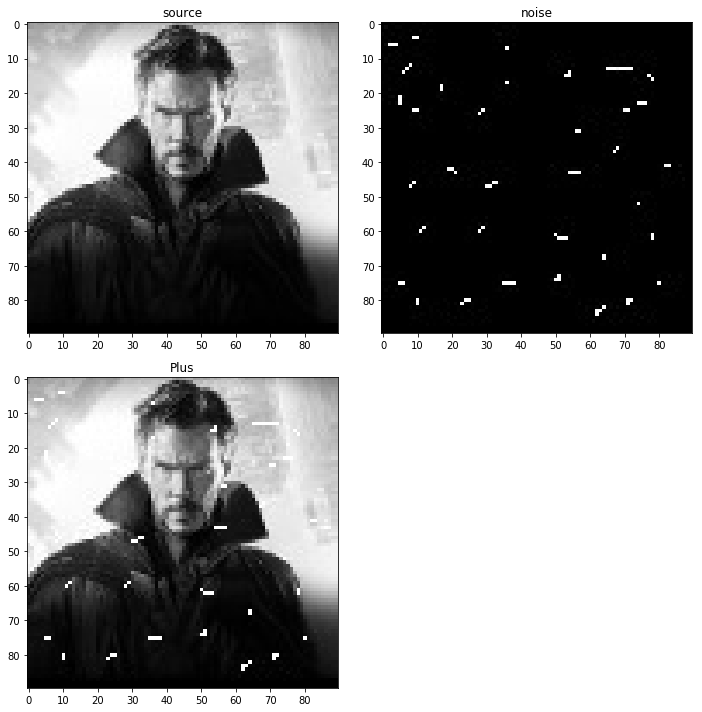

In [2]:
%matplotlib inline

from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

fpath = '../../resource/image/'
source = color.rgb2gray(io.imread(''.join([fpath, 'dr_strange90x90.jpg'])))
noise = color.rgb2gray(io.imread(''.join([fpath, 'noise.jpg'])))
new_img = np.zeros(source.shape, dtype='uint8')
new_img = source + noise 

for col in range(new_img.shape[0]):
    for row in range(new_img.shape[1]):
        pos = (col, row)
        if new_img[pos] > 1:
            new_img[pos] = 1

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
plt.title('source')
io.imshow(source)

fig.add_subplot(222)
plt.title('noise')
io.imshow(noise)

fig.add_subplot(223)
plt.title('Plus')
io.imshow(new_img)

plt.show()

## <b>Example ROI or sub image by multiply</b>
ROI = Region of Interest

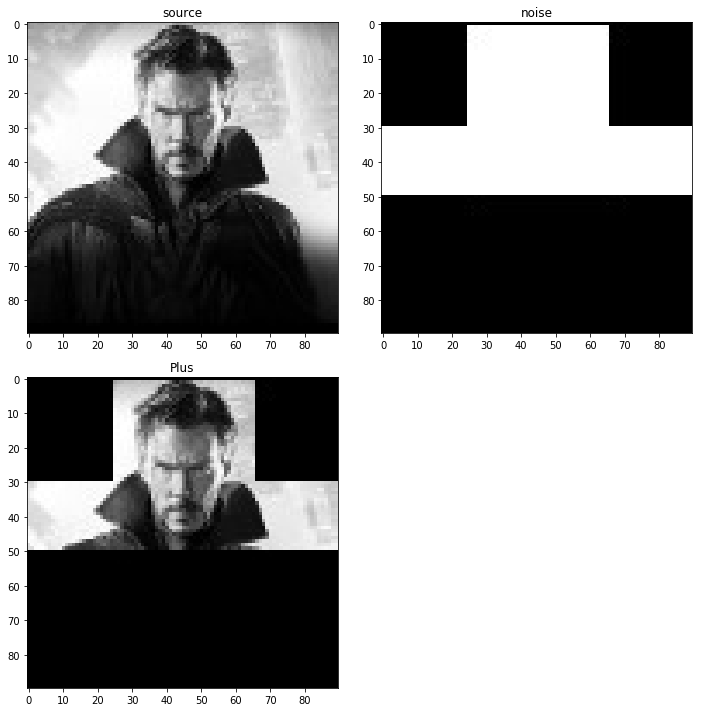

In [9]:
%matplotlib inline

from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

fpath = '../../resource/image/'
source = color.rgb2gray(io.imread(''.join([fpath, 'dr_strange90x90.jpg'])))
noise = color.rgb2gray(io.imread(''.join([fpath, 'roi.jpg'])))

# Addition
noise[30:50, :] = 1

new_img = np.zeros(source.shape, dtype='uint8')
new_img = source * noise

for col in range(new_img.shape[0]):
    for row in range(new_img.shape[1]):
        pos = (col, row)
        if new_img[pos] > 1:
            new_img[pos] = 1

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
plt.title('source')
io.imshow(source)

fig.add_subplot(222)
plt.title('noise')
io.imshow(noise)

fig.add_subplot(223)
plt.title('Plus')
io.imshow(new_img)

plt.show()

## <b>Example Somethings different in your images</b>

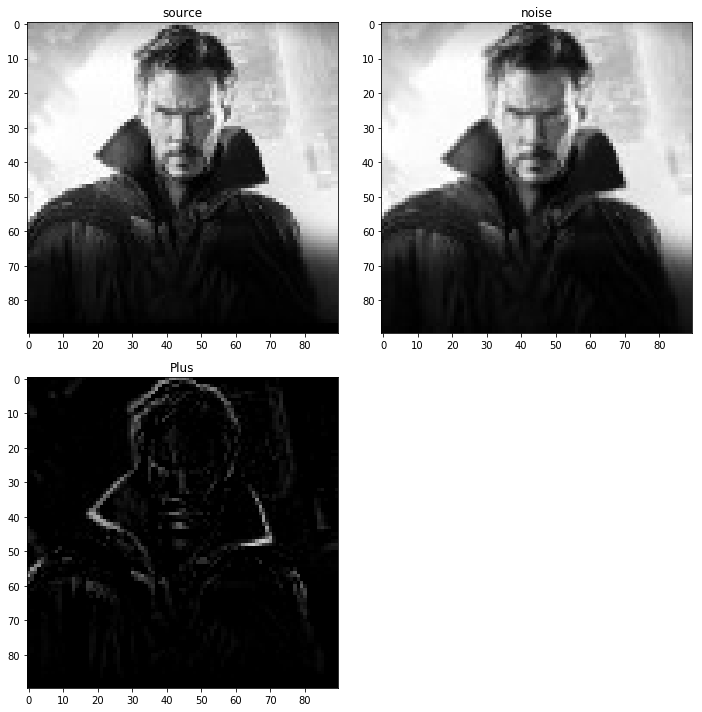

In [56]:
%matplotlib inline

from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

fpath = '../../resource/image/'
source = color.rgb2gray(io.imread(''.join([fpath, 'dr_strange90x90.jpg'])))
dest = color.rgb2gray(io.imread(''.join([fpath, 'dr_strange_scale.jpg'])))
new_img = np.zeros(source.shape, dtype='uint8')
new_img = source - dest

for col in range(new_img.shape[0]):
    for row in range(new_img.shape[1]):
        pos = (col, row)
        intensity = new_img[pos]
        if intensity > 1:
            new_img[pos] = 1
        elif intensity < 0:
            new_img[pos] = 0

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
plt.title('source')
io.imshow(source)

fig.add_subplot(222)
plt.title('noise')
io.imshow(dest)

fig.add_subplot(223)
plt.title('Plus')
io.imshow(new_img)

plt.show()